In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import galsim
from tqdm import tqdm
from censai.data.kappa_tng import decode_train, decode_all, decode_shape
from censai.definitions import log_10
# from astropy.visualization import ImageNormalize, LogStretch
from matplotlib.colors import LogNorm
plt.style.use('dark_background')

2021-11-16 09:39:01.685380: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-16 09:39:09.478479: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-16 09:39:09.480687: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-16 09:39:09.550626: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2021-11-16 09:39:09.550647: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-16 09:39:09.555746: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2

In [2]:
# datapath = "/home/aadam/scratch/Censai/data/kappa512_TNG100_trainset/"
datapath = "/home/aadam/scratch/Censai/data/hkappa128hst_TNG100_rau_trainset/"
files = glob.glob(os.path.join(datapath, "*.tfrecords"))
files = tf.data.Dataset.from_tensor_slices(files)
dataset = files.interleave(lambda x: tf.data.TFRecordDataset(x, compression_type="GZIP"), block_length=1, num_parallel_calls=tf.data.AUTOTUNE).map(decode_all)

In [3]:
for example in dataset:
    params_keys = ['kappa fov', 'kappa pixels']
    example = {key: example[key] for key in params_keys}
    break

2021-11-16 09:39:19.147498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-16 09:39:19.160556: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2645205000 Hz


In [6]:
pixels = example["kappa pixels"]
fov = example["kappa fov"]
example

{'kappa fov': <tf.Tensor: shape=(), dtype=float32, numpy=7.6887193>,
 'kappa pixels': <tf.Tensor: shape=(), dtype=int64, numpy=128>}

In [32]:
kappas = []
kappa_ids = []
moving_average = np.zeros(shape=(pixels, pixels, 1))

i = 0
for example in tqdm(dataset):
    if i < 1000:
        kappas.append(example['kappa'])
        kappa_ids.append(example['kappa id'].numpy())
    moving_average = (example['kappa'].numpy() + (i + 1) * moving_average) / (i + 2)
    i += 1
#     if i == 1000:
#         break

999it [00:00, 1971.39it/s]


In [29]:
# np.save(os.path.join(os.getenv("CENSAI_PATH"), "data", "hkappa128hst_TNG100_rau_trainset_average.npy"), moving_average)

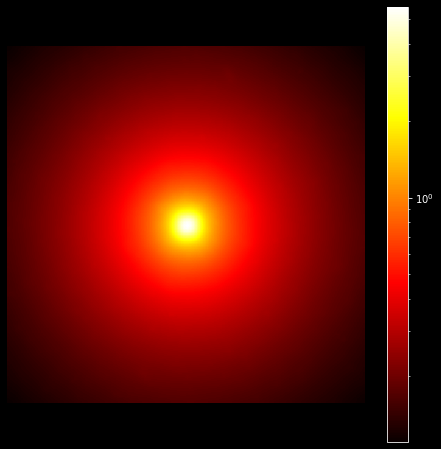

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(moving_average[..., 0], cmap="hot", norm=LogNorm())
plt.axis("off")
plt.colorbar()

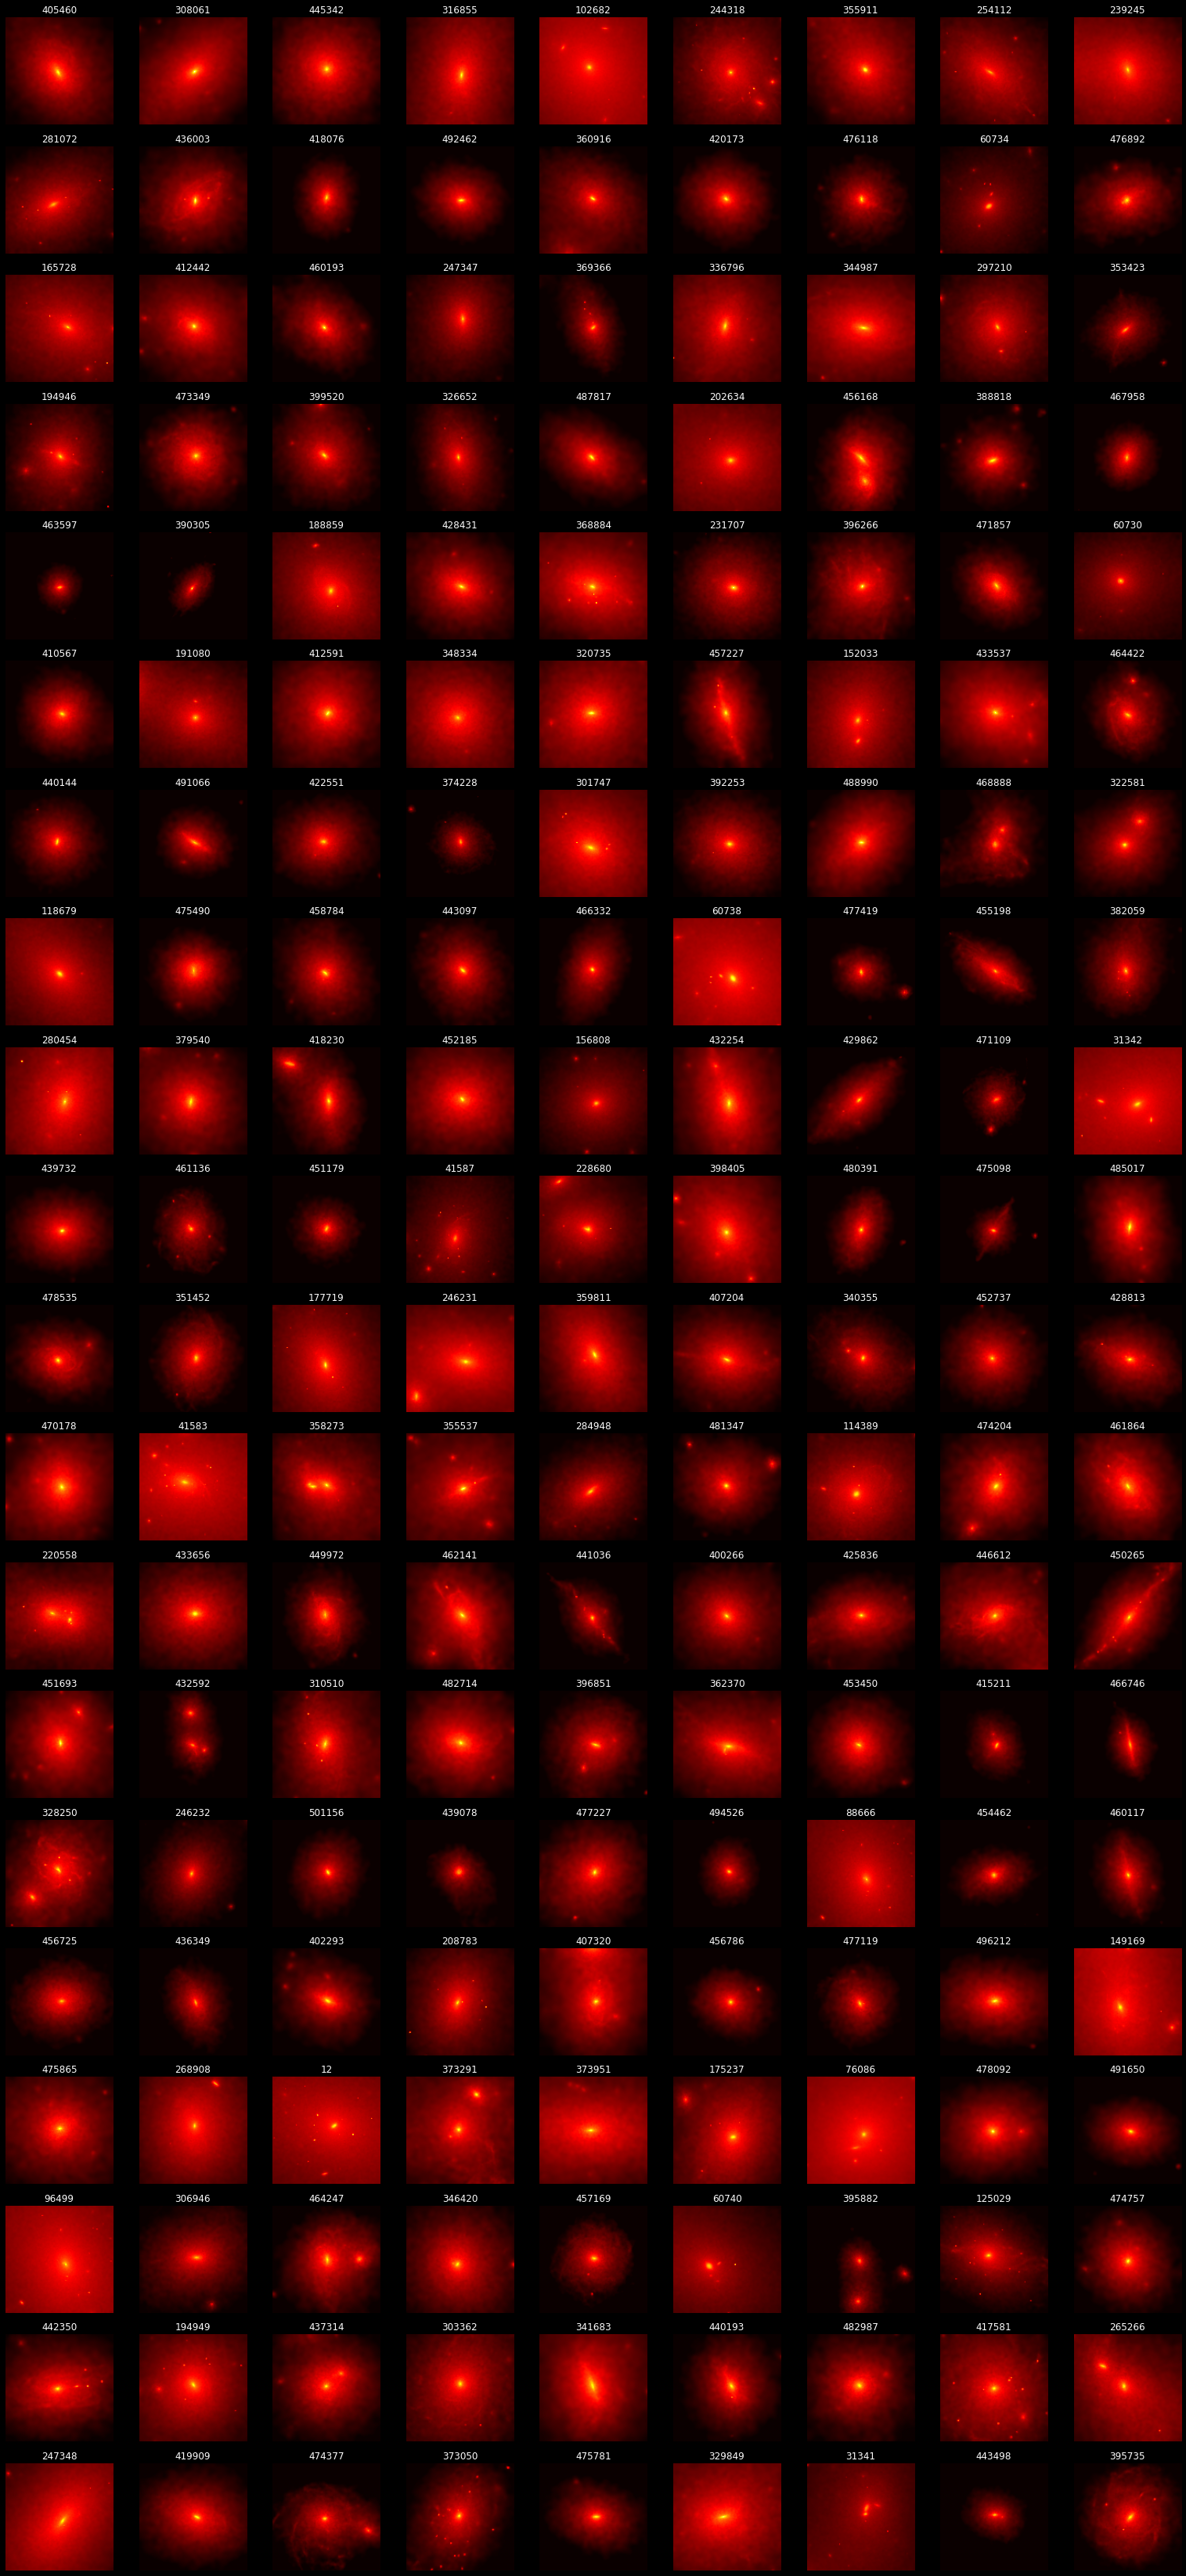

In [33]:
len_y = 20
len_x = 9
fig, axs = plt.subplots(len_y, len_x, figsize=(3 * len_x, 3 * len_y))
start = 0
for i in range(len_y):
    for j in range(len_x):
        k = i * len_x + j
        axs[i, j].imshow(kappas[k+start][..., 0], cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100))
        axs[i, j].axis("off")
        axs[i, j].set_title(kappa_ids[k+start])

# plt.subplots_adjust(wspace=0, hspace=-0.05)

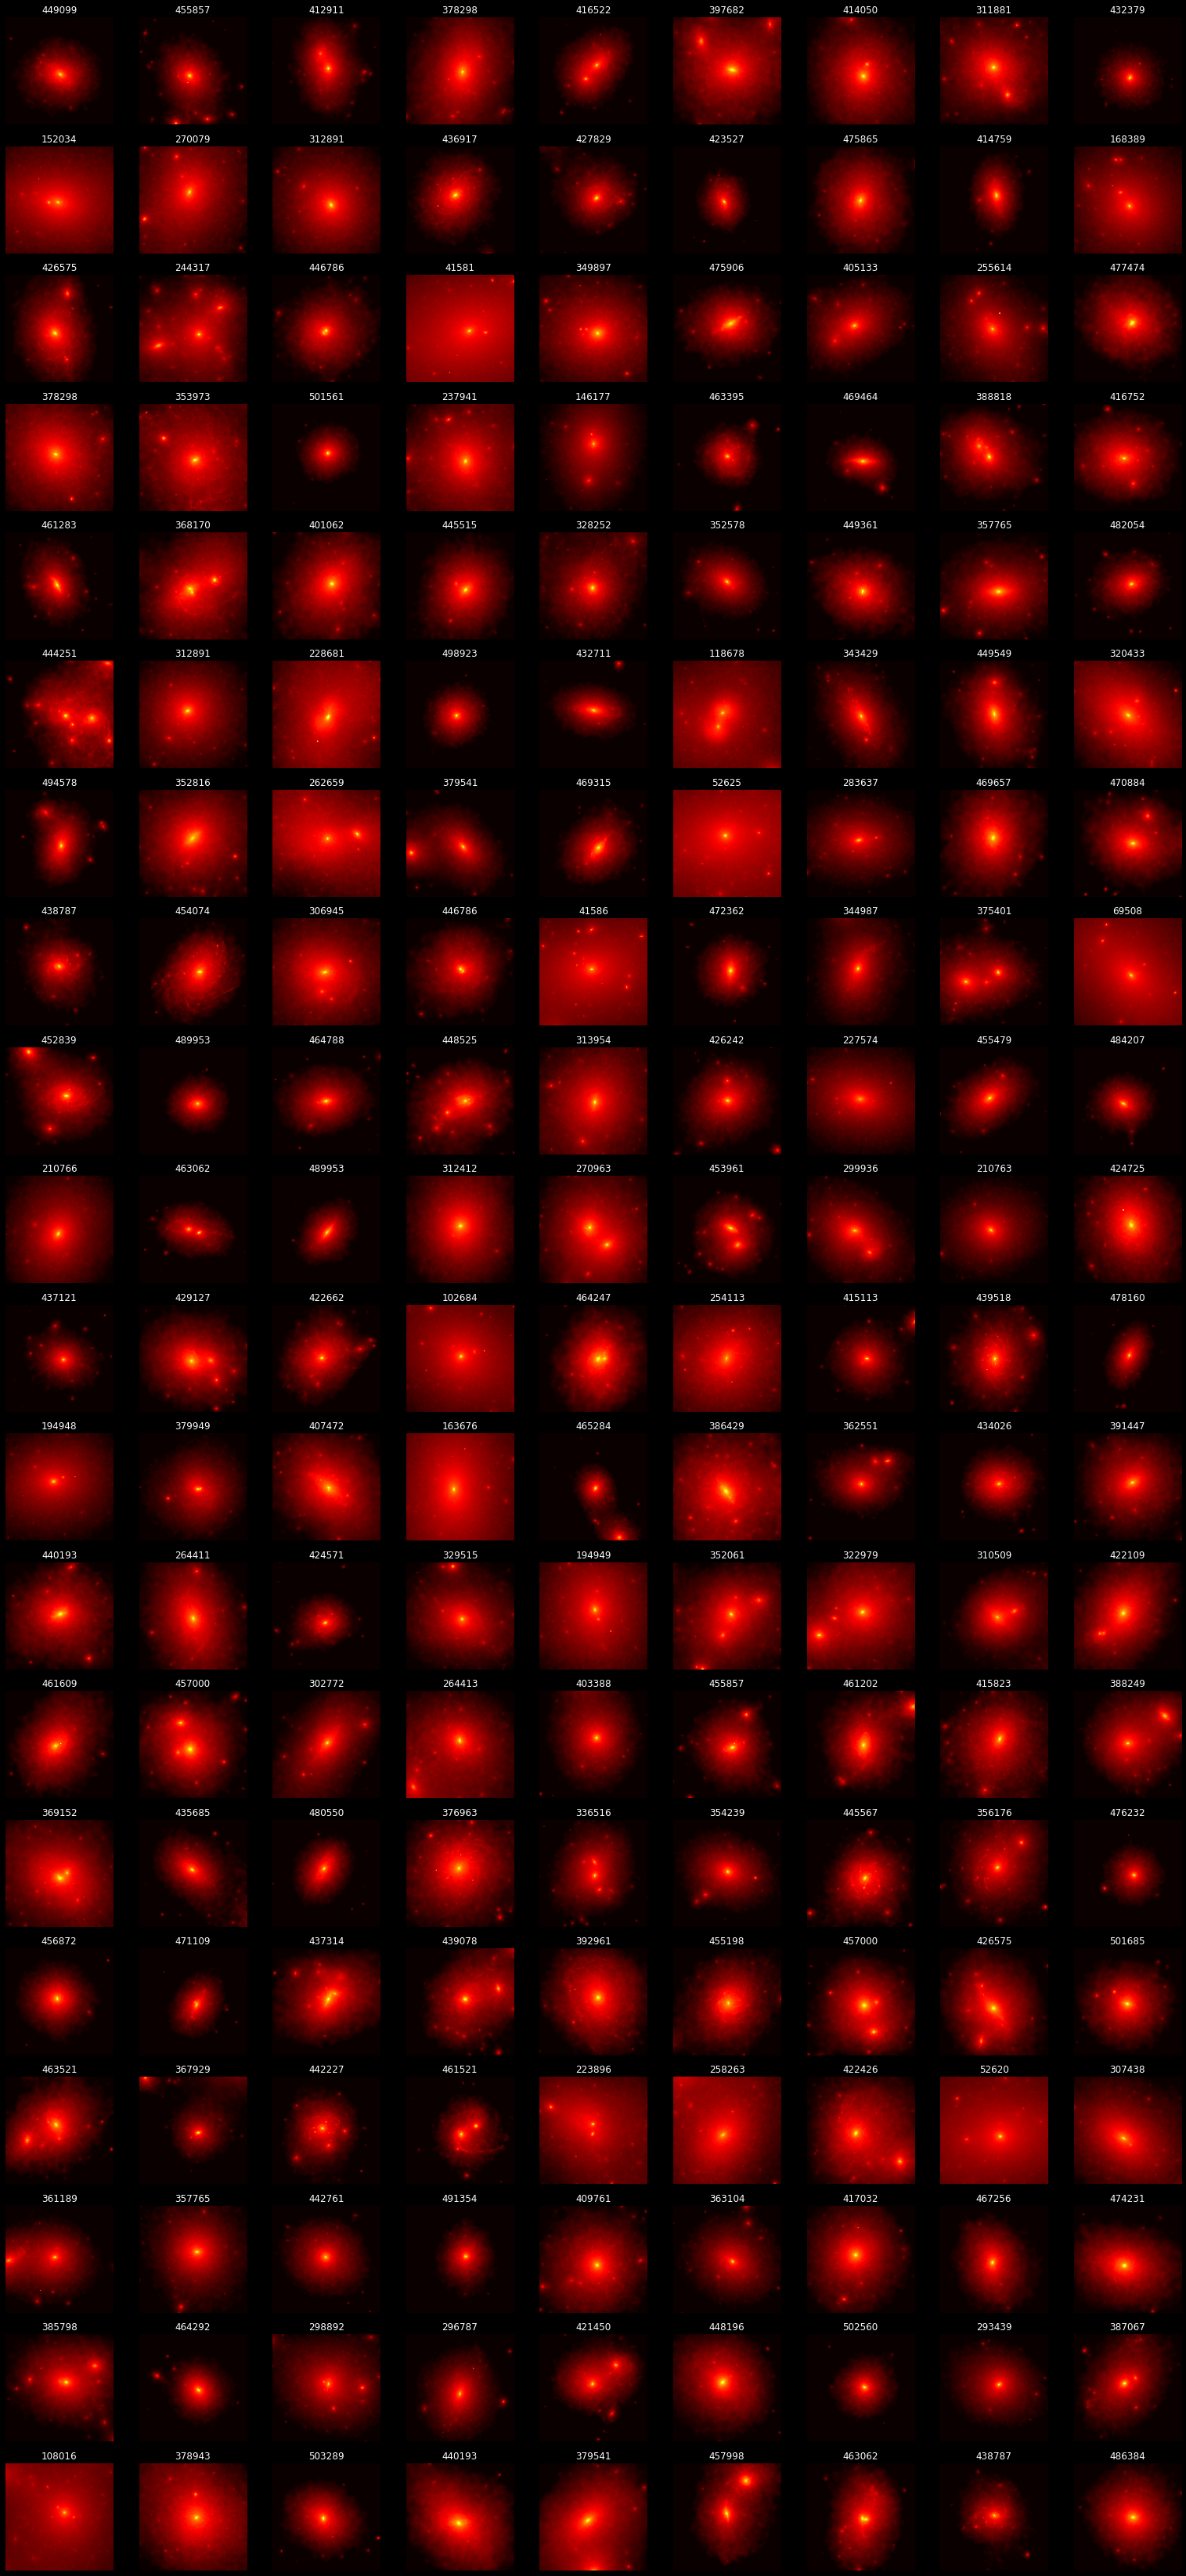

In [7]:
len_y = 20
len_x = 9
fig, axs = plt.subplots(len_y, len_x, figsize=(3 * len_x, 3 * len_y))
start = 0
for i in range(len_y):
    for j in range(len_x):
        k = i * len_x + j
        axs[i, j].imshow(kappas[k+start][..., 0], cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100))
        axs[i, j].axis("off")
        axs[i, j].set_title(kappa_ids[k+start])

# plt.subplots_adjust(wspace=0, hspace=-0.05)

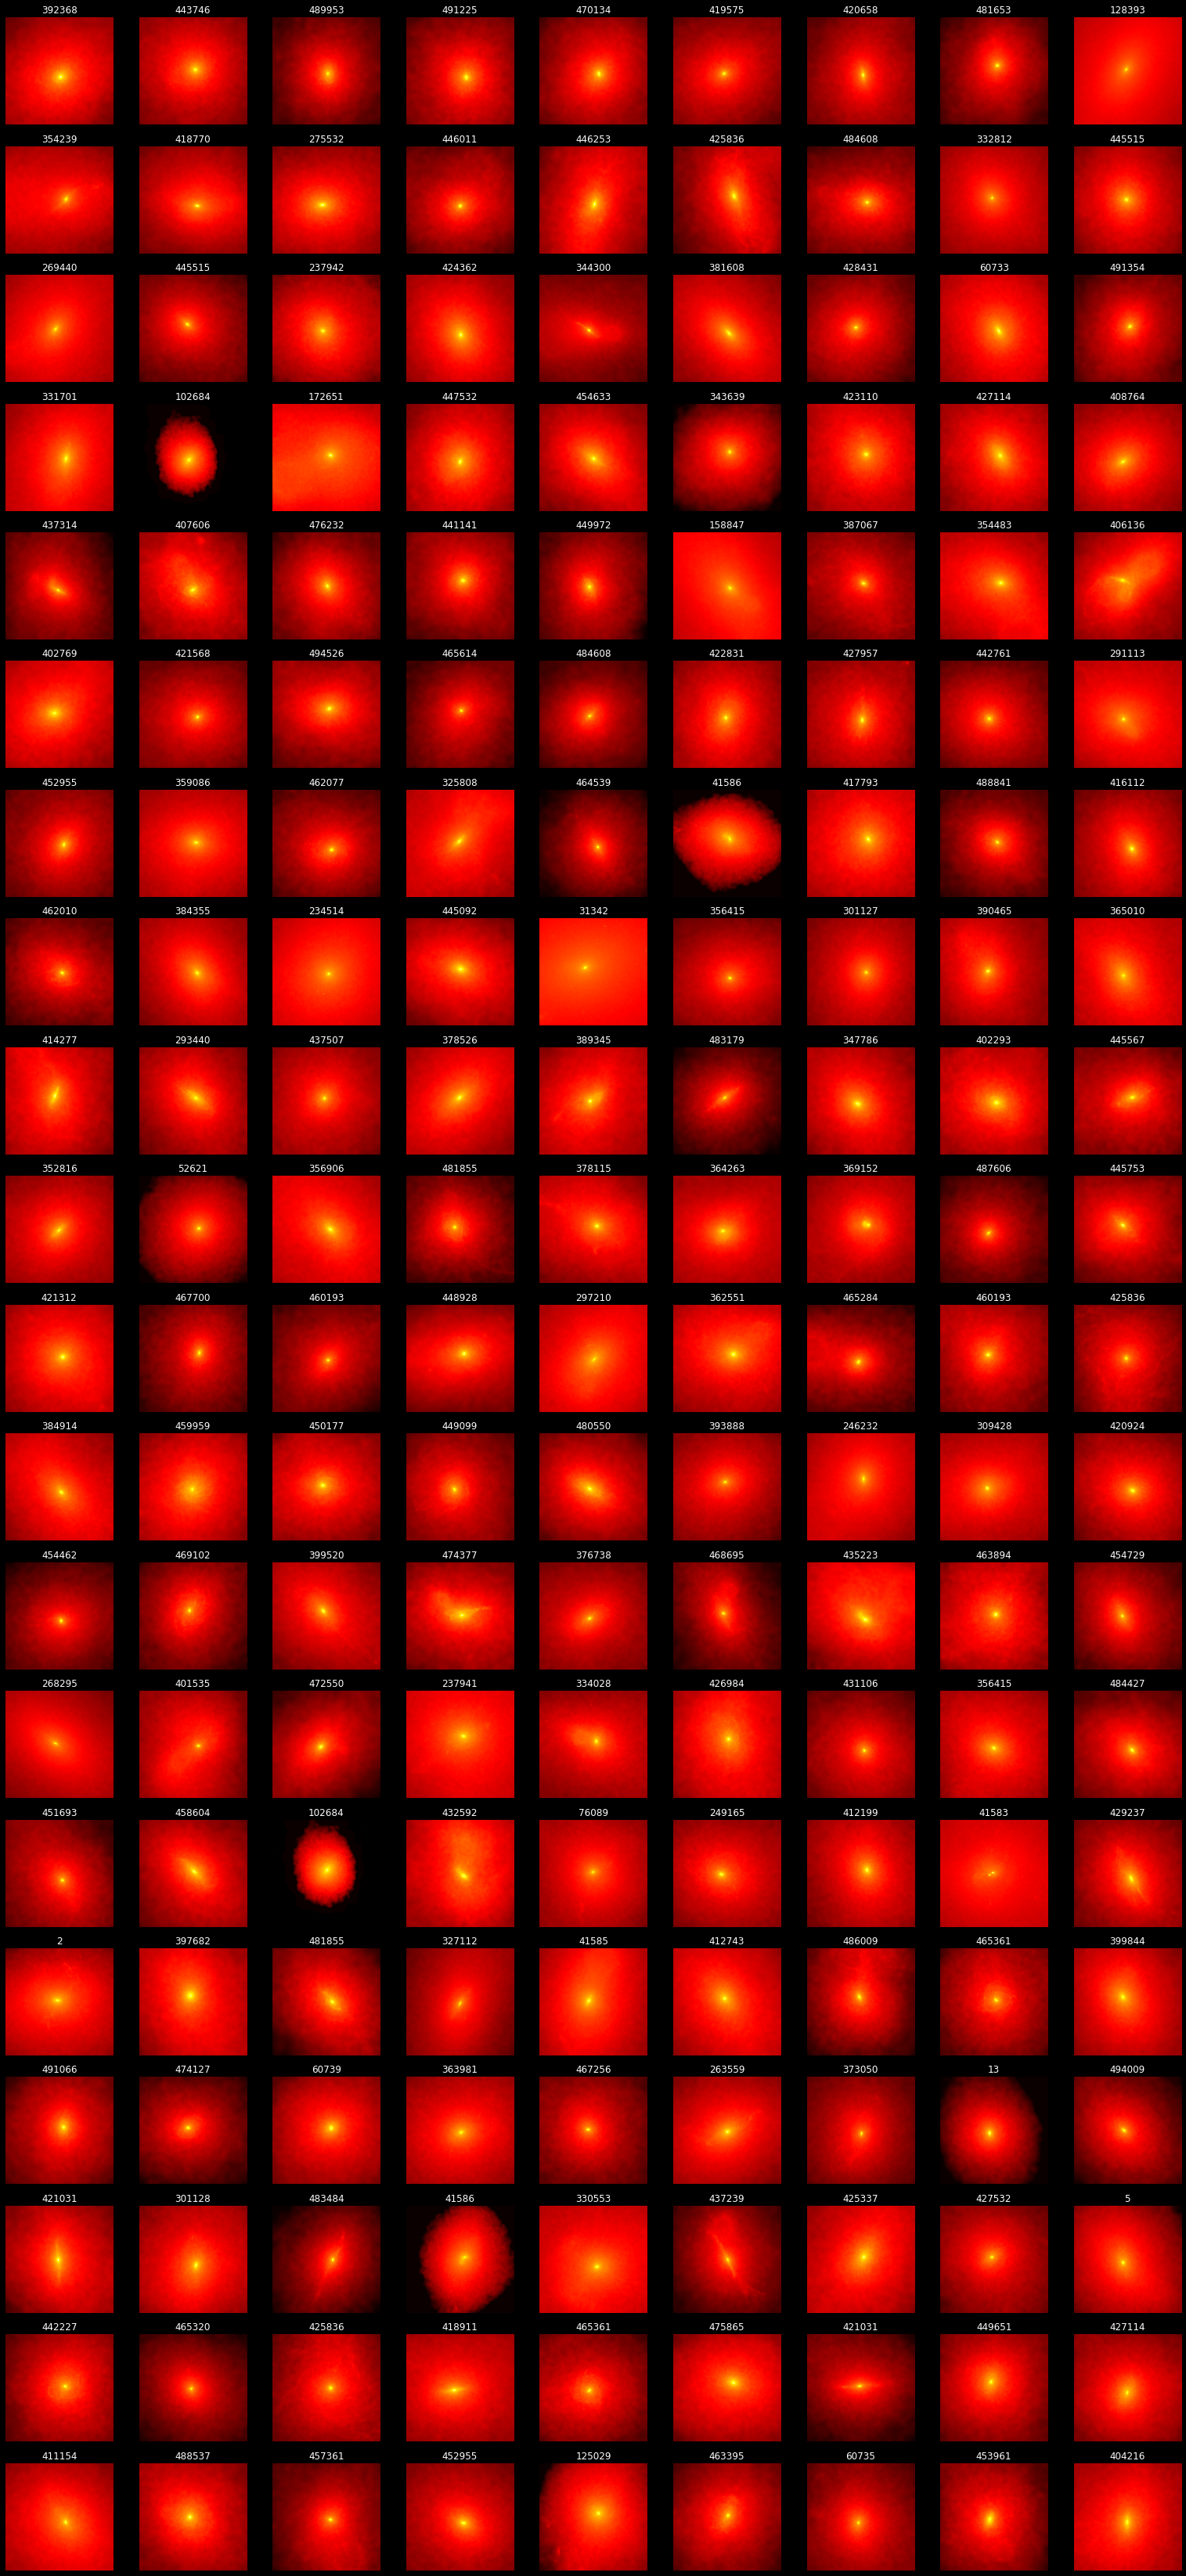

In [16]:
len_y = 20
len_x = 9
fig, axs = plt.subplots(len_y, len_x, figsize=(3 * len_x, 3 * len_y))
start = 1000
for i in range(len_y):
    for j in range(len_x):
        k = i * len_x + j
        axs[i, j].imshow(kappas[k+start][..., 0], cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100))
        axs[i, j].axis("off")
        axs[i, j].set_title(kappa_ids[k+start])

# plt.subplots_adjust(wspace=0, hspace=-0.05)